In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#4/JAGoTmJNBixrTrCZcDaa6hdqSwDZJBXTmXnzm1mVXgkjb6wDvWBu6l4

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os

os.listdir('/content/gdrive/My Drive/Datasets/person or not/')

['dataset.zip', 'dataset']

In [3]:
'''file_location = '/content/gdrive/My Drive/Datasets/person or not/dataset.zip'

!unzip file_location'''
#incase if it doesnt work use zip extractor extension from google drive

"file_location = '/content/gdrive/My Drive/Datasets/person or not/dataset.zip'\n\n!unzip file_location"

In [0]:
path_train = "/content/gdrive/My Drive/Datasets/person or not/dataset/train/"
path_test = "/content/gdrive/My Drive/Datasets/person or not/dataset/test/"
path_prediction="/content/gdrive/My Drive/Datasets/person or not/dataset/prediction"

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [6]:
#conv layers
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#fully connected layers
model.add(Flatten())  
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 827 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(
        path_test,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

Found 60 images belonging to 2 classes.


In [21]:
nb_train_samples =828
nb_validation_samples = 60
model.fit_generator(train_generator,
                    steps_per_epoch=827,
                    epochs=2,
                    validation_data=validation_generator,
                    validation_steps=60)


Epoch 1/2
827/827 [==============================] - 144s 174ms/step - loss: 0.1887 - acc: 0.9208 - val_loss: 0.3855 - val_acc: 0.8644
Epoch 2/2
827/827 [==============================] - 139s 168ms/step - loss: 0.1002 - acc: 0.9608 - val_loss: 0.6779 - val_acc: 0.8167


In [0]:
labels=["Person","Not Person"]
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#Prediction

In [0]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(path_prediction+'/2.jpg'
                           ,target_size =(150,150))


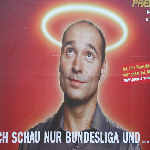

In [16]:
test_image

In [0]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [0]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [19]:
np.around(result)

array([[1., 0.]], dtype=float32)

In [20]:
for i in range(len(result[0])):
    print (labels[i],'-> ',result[0][i])

Person ->  1.0
Not Person ->  0.0
